In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)
from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import NelderMead

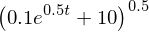

In [2]:
gamma, beta, k, m = args = var("gamma, beta, k, m")
t = var("t")

curve_expr = ((gamma + beta * exp(k * t)) ** m) 
display(curve_expr)
true_curve_expr = curve_expr.subs([(gamma, 10), (beta, 0.1), (k, 0.5), (m, 0.5)])
display(true_curve_expr)


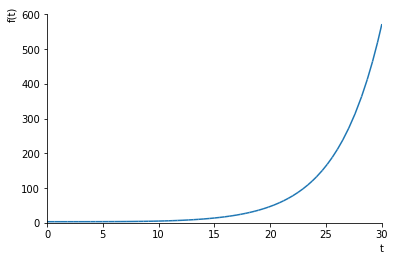

[(0, 3.1780497164141406), (5, 3.3493655214189966), (10, 4.9841063301516417), (15, 13.813190849532425)]


In [3]:
plot(true_curve_expr, (t, 0, 30))
true_curve = lambdify(t, true_curve_expr)
sample_data = [(time, true_curve(time)) for time in np.arange(0, 20, 5)]
print(sample_data)

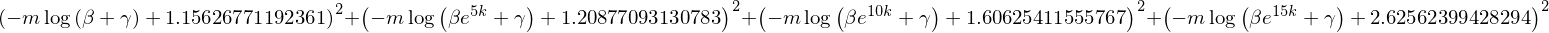

In [4]:
loss_expr = 0
for time, value in sample_data:
    pred_value = curve_expr.subs(t, time)
    value = log(value)
    pred_value = expand_log(log(pred_value), force=True)
    loss_expr += (value - pred_value) ** 2
f_expr = loss_expr
display(f_expr)

seed_num = 431
np.random.seed(seed_num)
low = 0.01
high = 2.5
points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
np_func = lambdify([args], f_expr, modules=np) 

In [5]:
nelder = NelderMead(np_func, points)
local_minima, _ = nelder.run()
print local_minima

0.23286330102


/Users/takada/.pyenv/versions/2.7.13/envs/krawczyk-dev/lib/python2.7/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in log
  """


In [6]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [7]:
X = ip([
    [interval[0.996, 1.0321]],
    [interval[0.124, 0.1384]], 
    [interval[0.11691, 0.207]]
])

# X = ip([
#     [interval[0.5, 1.6]],
#     [interval[0.5, 3.0]], 
#     [interval[0.6, 3.33]]
# ])
X = ip([
    [interval[9.996, 10.001]],
    [interval[0.0996, 0.10003]],    
    [interval[0.4999, 0.500003]], 
    [interval[0.49999, 0.5000002]]
])

f(X)

In [8]:
kra = Krawczyk(df, ddf, X)

In [9]:
import time
st = time.time()
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=5000)
print("{}[sec]".format(time.time() - st))

Loop end. cnt:5001, len(S):359, len(T):0, len(U):0

5001
---------- 最終的なS[:10] -----------
[[[interval([10.000116210937499, 10.00011865234375])],
  [interval([0.09999936023482772, 0.100000683327042])],
  [interval([0.500001390625, 0.500003])],
  [interval([0.4999951, 0.49999765])]],
 [[interval([10.00011865234375, 10.00012109375])],
  [interval([0.09999936014105565, 0.10000067953300909])],
  [interval([0.49999978125, 0.500001390625])],
  [interval([0.4999951, 0.49999765])]],
 [[interval([10.00011865234375, 10.00012109375])],
  [interval([0.09999936014105565, 0.10000067953300909])],
  [interval([0.500001390625, 0.500003])],
  [interval([0.4999951, 0.49999765])]],
 [[interval([10.000116210937499, 10.00011865234375])],
  [interval([0.09999920916230236, 0.10000076901072051])],
  [interval([0.49999978125, 0.500001390625])],
  [interval([0.49999765, 0.5000002])]],
 [[interval([10.000116210937499, 10.00011865234375])],
  [interval([0.09999920916230236, 0.10000076901072051])],
  [interval([0.5

In [18]:
if len(args) == 2: 
    visualize_optimization_log(kra, f, animation_box, skip=200)